In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install joblib

In [ ]:
%cd '/content/drive/My Drive/Moid Dissertations'
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
#file_path = r"resampled_data.csv"
file_path = r"diabetes_012_health_indicators_BRFSS2015.csv"
data = pd.read_csv(file_path)
df_model =  pd.read_csv(file_path)

/content/drive/My Drive/Moid Dissertations


In [ ]:
diab = data

# **EDA**

# Dataset Details

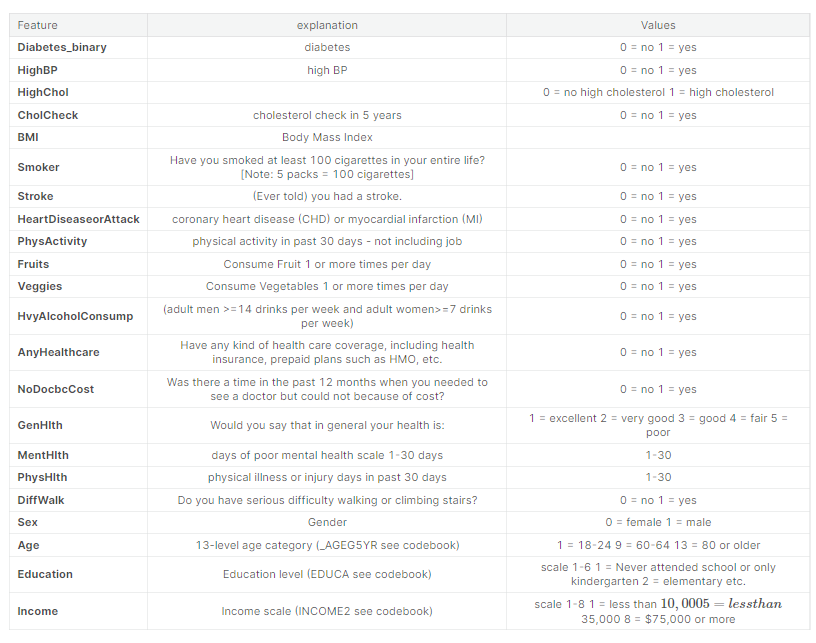

Effect Of Past Medical Condition On diabetic state

In [ ]:
discrete_var = ['HighBP','HighChol','CholCheck','Smoker','Stroke',
                'HeartDiseaseorAttack', 'Age', 'Sex','Education','Income',
                'PhysActivity','Fruits', 'Veggies', 'HvyAlcoholConsump',
                'AnyHealthcare', 'NoDocbcCost','GenHlth', 'MentHlth',
                'PhysHlth', 'DiffWalk']

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:1680: UserWarning: You passed a edgecolor/edgecolors ([(0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:1680: UserWarning: You passed a edgecolor/edgecolors ([(0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:1680: UserWarning: You passed a edgecolor/edgecolors ([(0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:1680: UserWar

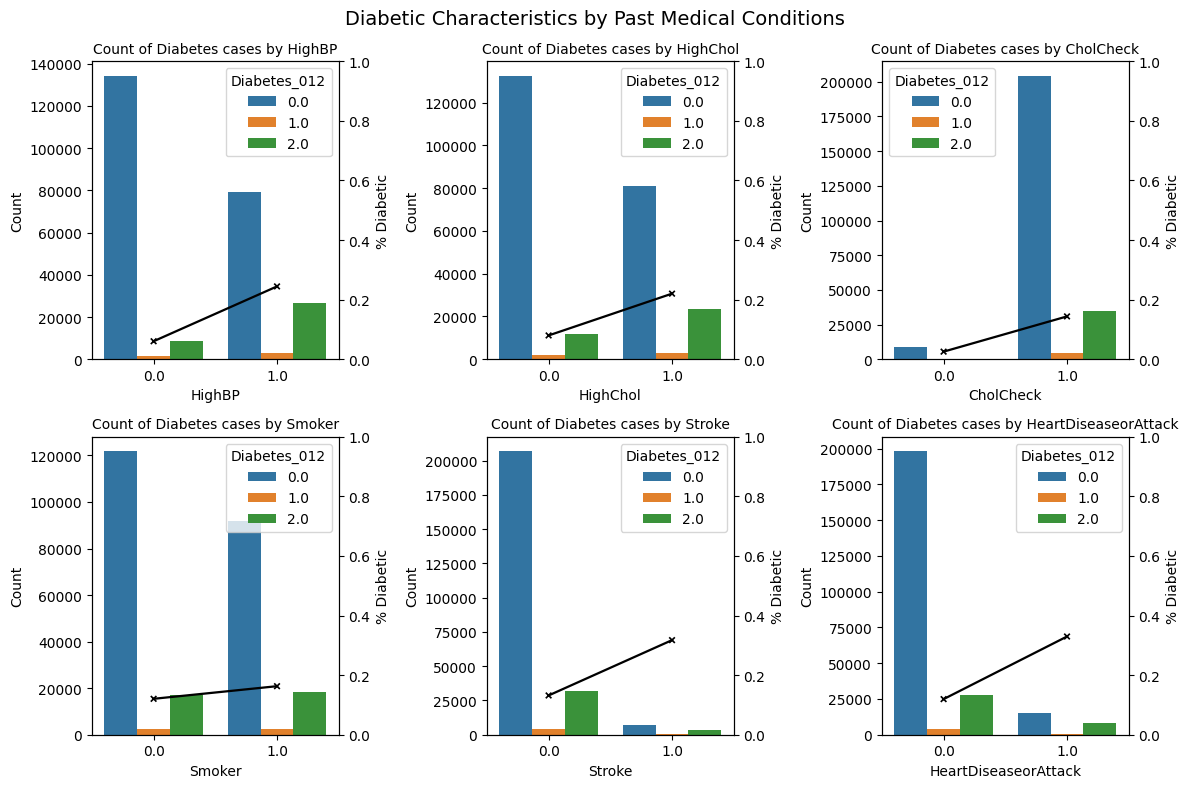

In [ ]:
# create a new column with binary indicator variable for Diabetes_012
diab["Diabetes_binary"] = diab["Diabetes_012"].apply(lambda x: 1 if x == 2 else 0)

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle("Diabetic Characteristics by Past Medical Conditions", fontsize=14)
for i, var in enumerate(discrete_var[0:6]):
    ax = axes[i//3][i%3]
    sns.countplot(x=var, hue="Diabetes_012", data=diab, ax=ax)
    ax.set_xlabel(var)
    ax.set_ylabel("Count")
    ax.set_title("Count of Diabetes cases by "+var,fontdict={"fontsize": 10})
    ax2=ax.twinx()
    ax2 = sns.pointplot(x=var, y="Diabetes_binary", data=diab.groupby(var).mean().reset_index(),color='black',markers='x',scale=0.6, ax=ax2)
    ax2.set_ylim([0, 1])
    ax2.set_ylabel("% Diabetic", color='black')
plt.tight_layout()
plt.show()

**Key Insights:**

Data tells that increasing age have higher risk of diabetes.
Males are found to possess slightly higher risk of diabetes.
People with higher education, income are found to be on lower risk
People who are physically active, eats fruits veggies everyday are found to be on lower risk according to data.
We can clearly see rise of diabetic risk in people who have high BP, High Col.
Smokers have higer risk of Diabetes
History of stroke and heart diseases possess greater risk to being diabetic as per data

# Gender Distribution

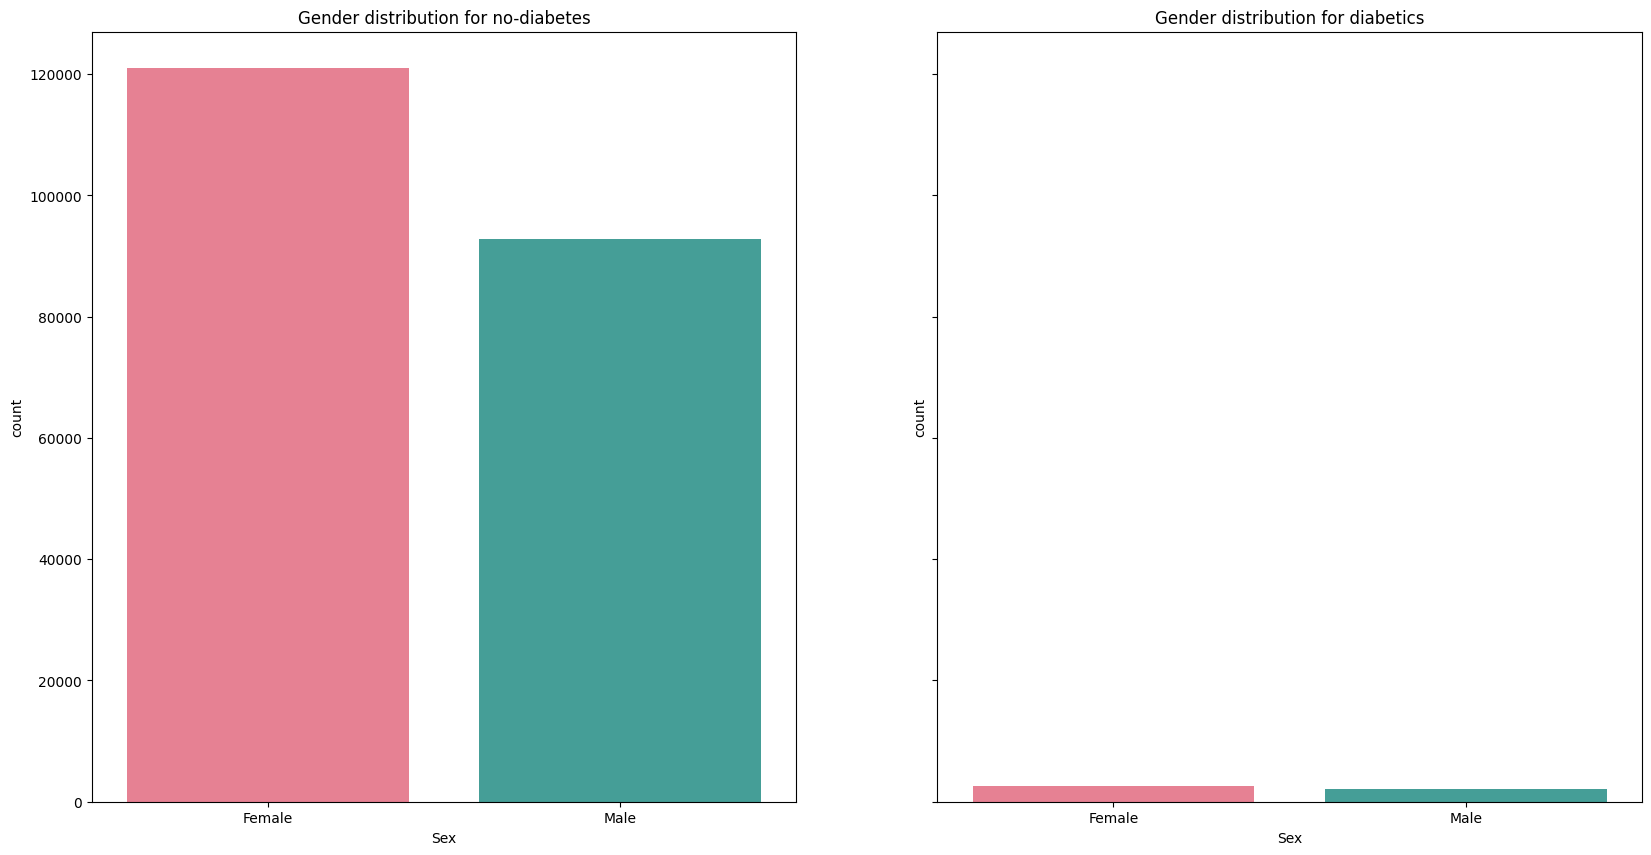

In [ ]:
# Might be useful later to divide dataset into two - diabetes and no_diabetes
df_no = data[data['Diabetes_012'] == 0]
df_yes = data[data['Diabetes_012'] == 1]

# Lets discover gender distribution
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(20,10))
ax1 = sns.countplot(data=df_no, x='Sex', ax=ax1, palette='husl')
ax1.set(title='Gender distribution for no-diabetes')
ax1.set_xticklabels(['Female', 'Male'])

ax2 = sns.countplot(data=df_yes, x='Sex', ax=ax2, palette='husl')
ax2.set(title='Gender distribution for diabetics')
ax2.set_xticklabels(['Female', 'Male'])
plt.show()

# Lets discover gender distribution
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(20,10))
ax1 = sns.countplot(data=df_no, x='Sex', ax=ax1, palette='husl')
ax1.set(title='Gender distribution for no-diabetes')
ax1.set_xticklabels(['Female', 'Male'])

ax2 = sns.countplot(data=df_yes, x='Sex', ax=ax2, palette='husl')
ax2.set(title='Gender distribution for diabetics')
ax2.set_xticklabels(['Female', 'Male'])
plt.show()

# Age Distribution

[Text(0, 0, '18-24'),
 Text(1, 0, '25-29'),
 Text(2, 0, '30-34'),
 Text(3, 0, '35-39'),
 Text(4, 0, '40-44'),
 Text(5, 0, '45-49'),
 Text(6, 0, '50-54'),
 Text(7, 0, '55-59'),
 Text(8, 0, '60-64'),
 Text(9, 0, '65-69'),
 Text(10, 0, '70-74'),
 Text(11, 0, '75-79'),
 Text(12, 0, '>80')]

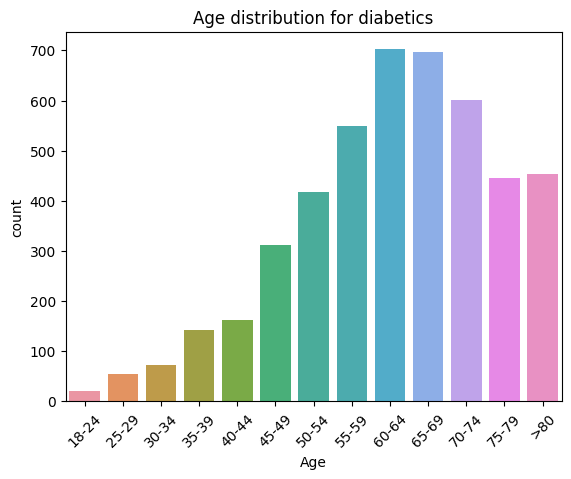

In [ ]:
# Check age distribution for people with diabetes
ax = sns.countplot(data=df_yes, x='Age')
ax.set(title= 'Age distribution for diabetics')
ax.set_xticklabels(['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '>80'], rotation = 45)


# BMI Exploration

In [ ]:
# Check BMI for people with diabetes.
# We will remove outliers for better visualization, less than 15 and greater than 60.
sns.histplot(data=df_yes, x='BMI').set(title='BMI distribution for diabetics')
plt.xlim(15, 60)

# Health Condition Distribution

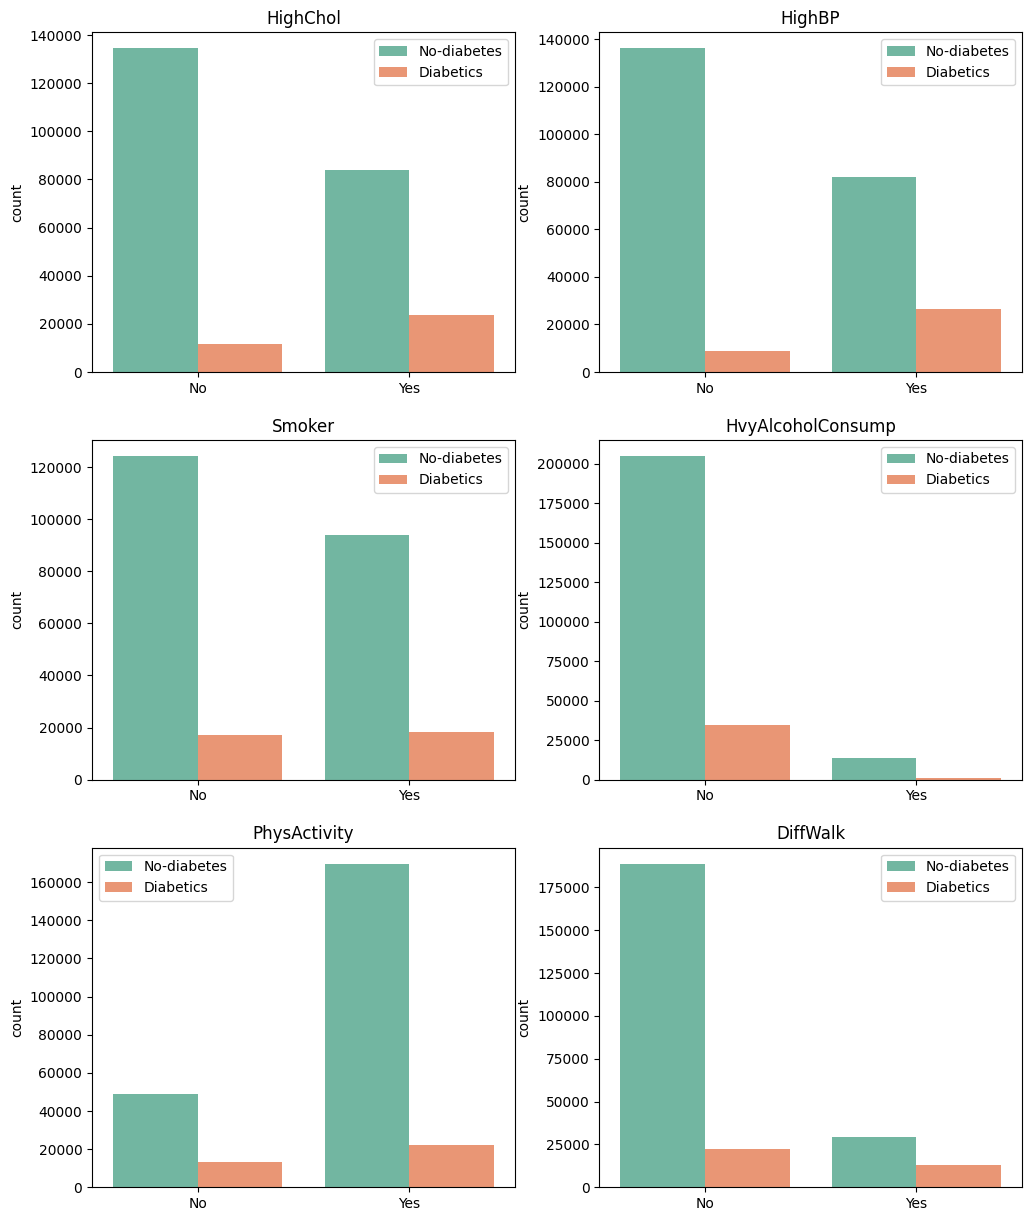

In [ ]:
col_names = ['HighChol', 'HighBP', 'Smoker', 'HvyAlcoholConsump', 'PhysActivity', 'DiffWalk']
a = 3 #number of rows
b = 2 #number of columns
c = 1 #plot counter

fig = plt.figure(figsize=(12,15))
for i in col_names:
    plt.subplot(a, b, c)
    ax = sns.countplot(data=data, x=i, hue='Diabetes_binary', palette='Set2')
    ax.set(title = '{}'.format(i))
    ax.set(xlabel=None)
    ax.set_xticklabels(['No', 'Yes'])
    ax.legend(['No-diabetes', 'Diabetics'])
    c = c + 1



**Key Insights :**

Both females and males are vulnerable to diabetes.
Age groups that are most affected by diabetes 60-64, 65-70, 70-74.
People with diabetes have higher BMI.
People with diabetes tend to have high cholesterol levels and high blood pressure.
Diabetics have fewer physical activities and difficulty walking.
Smoking and alcohol consumption doesn't affect diabetes status much.
Variables correlated with diabetes status are general health, high blood pressure, high cholesterol, BMI, difficulties in walking, and age.

# **How Diabetic, No Diabetic and re Diabetic Patients have differnet health condition than other?**

**BMI vs high  diabetics and no-diabetes?**

H0 - no-diabetes and diabetics have the same average BMI.
Ha - no-diabetes and diabetics have different average BMI.

Average BMI for diabetics is 30.724465558194776 and no-diabetes is 27.742521162548023 
Reject Null Hypothesis
no-diabetes and diabetics have different average BMI.


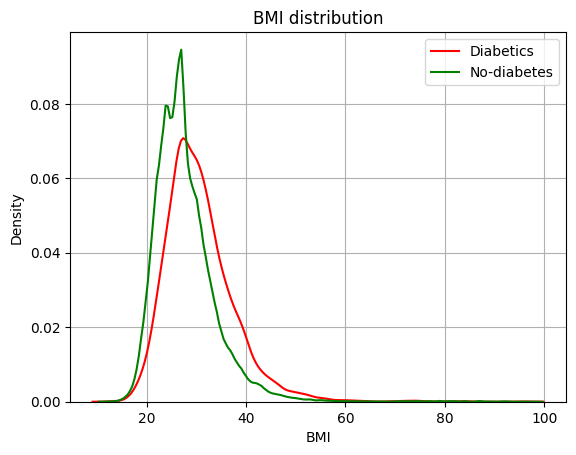

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats  # Add this line to import the stats module

# Assuming df_yes and df_no are your DataFrames

# Lets prepare dataset
df_no_bmi = df_no['BMI']
df_yes_bmi = df_yes['BMI']

# Check the average BMI
print('Average BMI for diabetics is {} and no-diabetes is {} '.format(df_yes_bmi.mean(), df_no_bmi.mean()))

# Check visually how BMI distribution looks like
sns.kdeplot(df_yes_bmi, color='red')
sns.kdeplot(df_no_bmi, color='green')
plt.grid()
plt.title('BMI distribution')
plt.legend(['Diabetics', 'No-diabetes'])

# Perform t-test
ttest, p_value_1 = stats.ttest_ind(df_yes_bmi, df_no_bmi)

if p_value_1 < 0.05:
    print('Reject Null Hypothesis')
    print("no-diabetes and diabetics have different average BMI.")
else:
    print('Failed to reject Null Hypothesis')
    print("no-diabetes and diabetics have the same average BMI.")


**Poor Physical Health Vs diabetics and no-diabetes?**

H0 - No-diabetes and diabetics have the same average number of poor physical health days per month.
Ha - No-diabetes and diabetics have the different average number of poor physical health days per month

---



Average days of poor physical health for diabetics is 6.348304901749082 and no-diabetics is 3.582415782651624 
Reject Null Hypothesis


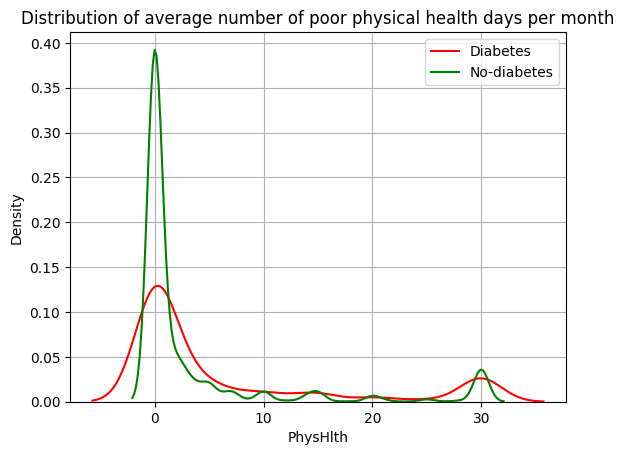

In [ ]:
# Prepare datasets
df_no_ph = df_no['PhysHlth']
df_yes_ph = df_yes['PhysHlth']# Check the distribution of average number of poor physical health days per month
sns.kdeplot(df_yes_ph,color='red')
sns.kdeplot(df_no_ph,color='green')
plt.grid()
plt.title('Distribution of average number of poor physical health days per month')
plt.legend(['Diabetes', 'No-diabetes'])
# Count average days
print('Average days of poor physical health for diabetics is {} and no-diabetics is {} '.format(df_yes_ph.mean(),df_no_ph.mean()))
# Use ttest
ttest,p_value_2  = stats.ttest_ind(df_yes_ph, df_no_ph)
if p_value_2 < 0.05:
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

**high cholesterol vs diabetics and no-diabetes?**

H0 - High cholesterol proportion is not significantly different across diabetics and no-diabetes.
Ha - High cholesterol proportion is different across diabetics and no-diabetes.

HighChol            0.0    1.0
Diabetes_binary               
0                134429  83905
1                 11660  23686
Reject Null Hypothesis


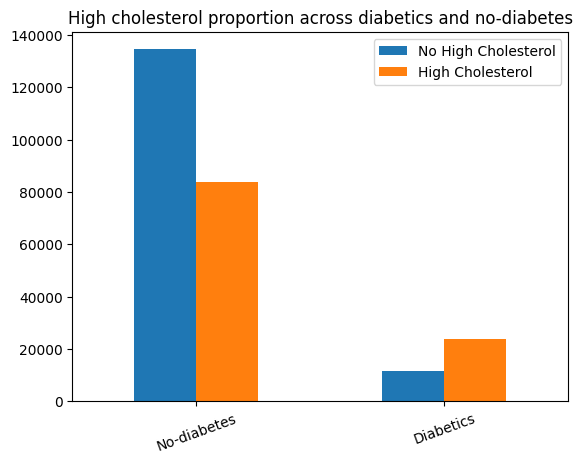

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency  # Add this line to import the chi2_contingency function

# Assuming data is your DataFrame

# Prepare data
contingency = pd.crosstab(data['Diabetes_binary'], data['HighChol'])
print(contingency)

# Visualize high cholesterol proportions
ax = contingency.plot(kind='bar')
ax.set(xlabel=None)
ax.set_xticklabels(['No-diabetes', 'Diabetics'], rotation=20)
ax.legend(['No High Cholesterol', 'High Cholesterol'])
plt.title('High cholesterol proportion across diabetics and no-diabetes')

# Perform chi-squared test
chi2, p_value_3, dof, exp_freq = chi2_contingency(contingency)

if p_value_3 < 0.05:
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')


**high blood pressure vs diabetics and no-diabetes?**

H0 - High blood pressure proportion is not significantly different across diabetics and no-diabetes.
Ha - High blood pressure proportion is different across diabetics and no-diabetes.

Reject Null Hypothesis


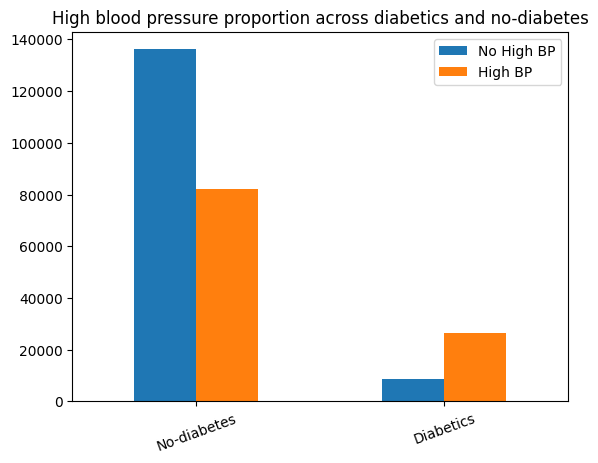

In [ ]:
contingency2= pd.crosstab(data.Diabetes_binary, data.HighBP)
contingency2
# Visualize proportion of high blood pressure for people with and without diabetes
ax = contingency2.plot(kind='bar')
ax.set(xlabel=None)
ax.set_xticklabels(['No-diabetes', 'Diabetics'], rotation=20)
ax.legend( ['No High BP', 'High BP'])
plt.title('High blood pressure proportion across diabetics and no-diabetes')
# Chi2 test for two categorical variables
chi2, p_value_4, dof, exp_freq = chi2_contingency(contingency2)
if (p_value_4 < 0.05):
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

**Conclusion:**
1. The focal point of the dataset revolves around the binary target feature, Diabetes_binary.

2. Comprising a total of 15 discrete and 7 continuous feature variables, the dataset presents a diverse set of factors for analysis.

3. It is noteworthy that the dataset exhibits completeness, as there are no instances of missing values or null entries.

4. Key contributors to the prediction of diabetes within the dataset include HighBP, HighChol, BMI, Stroke, GenHlth, MentHlth, PhysHlth, Age, Education, and Income.

5. Notable associations indicating an increased risk of diabetes involve pairs of feature variables such as Smoking and HeavyAlcoholConsumption, Stroke and HeartDiseaseorAttack, as well as HighBP and HighChol.

6. While some variables have a relatively lower impact on diabetes, including PhysActivity, Fruits, Veggies, AnyHealthcare, and CholChek, they still play a role in potentially reducing the risk of diabetes.

# **MODEL TRAINING**

## **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming your data is in a DataFrame called 'df'
# Drop the target variable from X
X = df_model.drop(['Diabetes_012'], axis=1)

# Extract the target variable
y = df_model['Diabetes_012']

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))

# Feature importance analysis
feature_importances = pd.Series(rf_classifier.feature_importances_, index=X.columns)
print('\nFeature Importance:\n', feature_importances)


Accuracy: 0.8412172816146326

Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.97      0.91     42795
         1.0       0.00      0.00      0.00       944
         2.0       0.47      0.20      0.28      6997

    accuracy                           0.84     50736
   macro avg       0.44      0.39      0.40     50736
weighted avg       0.79      0.84      0.81     50736


Feature Importance:
 HighBP                  0.040921
HighChol                0.026326
CholCheck               0.003897
BMI                     0.184720
Smoker                  0.033804
Stroke                  0.012394
HeartDiseaseorAttack    0.017604
PhysActivity            0.026342
Fruits                  0.033977
Veggies                 0.026640
HvyAlcoholConsump       0.008166
AnyHealthcare           0.009098
NoDocbcCost             0.015500
GenHlth                 0.067250
MentHlth                0.064505
PhysHlth                0.084019
DiffWalk       

In [ ]:
#saving model
import joblib

# ... (your previous code for training the model)

# Save the trained model
model_filename = 'random_forest_model.joblib'
joblib.dump(rf_classifier, model_filename)


['random_forest_model.joblib']

In [ ]:
#loading model
import pandas as pd

# Example: Replace this with your actual new data
new_data = pd.DataFrame({
    'HighBP': [0],
    'HighChol': [0],
    'CholCheck': [0],
    'BMI': [25.0],
    'Smoker': [0],
    'Stroke': [1],
    'HeartDiseaseorAttack': [1],
    'PhysActivity': [1],
    'Fruits': [1],
    'Veggies': [0],
    'HvyAlcoholConsump': [1],
    'AnyHealthcare': [0],
    'NoDocbcCost': [1],
    'GenHlth': [4],
    'MentHlth': [10],
    'PhysHlth': [20],
    'DiffWalk': [0],
    'Sex': [1],
    'Age': [7],
    'Education': [6],
    'Income': [7]
})


# Later, when you want to use the pre-trained model to make predictions
# Load the model
loaded_model = joblib.load(model_filename)

# Assuming you have new input data in a DataFrame called 'new_data'
# Convert categorical variables to numerical using one-hot encoding
new_data = pd.get_dummies(new_data)

# Make predictions using the pre-trained model
predictions = loaded_model.predict(new_data)

# Display predictions
print(predictions)


[0.]


## **GradientBoostingClassifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Create and train the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred_gb)}')
print('\nClassification Report:\n', classification_report(y_test, y_pred_gb))


Accuracy: 0.8508554083885209

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.98      0.92     42795
         1.0       0.00      0.00      0.00       944
         2.0       0.55      0.20      0.30      6997

    accuracy                           0.85     50736
   macro avg       0.47      0.39      0.41     50736
weighted avg       0.81      0.85      0.82     50736



In [ ]:
#saving model
import joblib

# ... (your previous code for training the model)

# Save the trained model
model_filename = 'GradientBoostingClassifier.joblib'
joblib.dump(gb_classifier, model_filename)


['GradientBoostingClassifier.joblib']

##**Restricted Boltzmann Machines (RBMs):**

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Assuming your data is in a DataFrame called 'df'
# Drop the target variable from X
X = data.drop(['Diabetes_012'], axis=1)

# Extract the target variable
y = data['Diabetes_012']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = pd.get_dummies(X).astype('float64')
X_scaled[X.select_dtypes(['float64']).columns] = scaler.fit_transform(X_scaled[X.select_dtypes(['float64']).columns])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the MLP model using TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Save the trained model
model.save('mlp_model.h5')

# Later, when you want to use the pre-trained model to make predictions
# Load the model
loaded_model = tf.keras.models.load_model('mlp_model.h5')

# Make predictions using the pre-trained model
y_pred_prob = loaded_model.predict(X_test)
y_pred_mlp = (y_pred_prob > 0.5).astype(int)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred_mlp)}')
print('\nClassification Report:\n', classification_report(y_test, y_pred_mlp))


Epoch 1/10
5074/5074 [==============================] - 26s 5ms/step - loss: 0.2721 - accuracy: 0.7158 - val_loss: 0.0153 - val_accuracy: 0.7530
Epoch 2/10
5074/5074 [==============================] - 16s 3ms/step - loss: -1.6598 - accuracy: 0.7191 - val_loss: -3.5340 - val_accuracy: 0.7019
Epoch 3/10
5074/5074 [==============================] - 15s 3ms/step - loss: -9.6952 - accuracy: 0.7151 - val_loss: -13.2196 - val_accuracy: 0.7112
Epoch 4/10
5074/5074 [==============================] - 14s 3ms/step - loss: -28.5279 - accuracy: 0.7117 - val_loss: -34.6879 - val_accuracy: 0.6449
Epoch 5/10
5074/5074 [==============================] - 13s 3ms/step - loss: -62.1472 - accuracy: 0.7085 - val_loss: -68.7408 - val_accuracy: 0.7218
Epoch 6/10
5074/5074 [==============================] - 12s 2ms/step - loss: -115.6734 - accuracy: 0.7032 - val_loss: -117.9031 - val_accuracy: 0.6408
Epoch 7/10
5074/5074 [==============================] - 15s 3ms/step - loss: -190.0261 - accuracy: 0.6974 - val

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1586/1586 [==============================] - 2s 1ms/step
Accuracy: 0.7041548407442447

Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.83      0.87     42795
         1.0       0.03      0.43      0.06       944
         2.0       0.00      0.00      0.00      6997

    accuracy                           0.70     50736
   macro avg       0.32      0.42      0.31     50736
weighted avg       0.77      0.70      0.73     50736



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **Multilayer Perceptrons (MLPs):**

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Assuming your data is in a DataFrame called 'df'
# Drop the target variable from X
X = data.drop(['Diabetes_012'], axis=1)

# Extract the target variable
y = data['Diabetes_012']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = pd.get_dummies(X).astype('float64')
X_scaled[X.select_dtypes(['float64']).columns] = scaler.fit_transform(X_scaled[X.select_dtypes(['float64']).columns])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the MLP model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(3, activation='softmax')  # Assuming 3 classes for your problem
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model
y_pred_mlp = model.predict(X_test)
y_pred_mlp_classes = y_pred_mlp.argmax(axis=1)
print(f'Accuracy: {accuracy_score(y_test, y_pred_mlp_classes)}')
print('\nClassification Report:\n', classification_report(y_test, y_pred_mlp_classes))


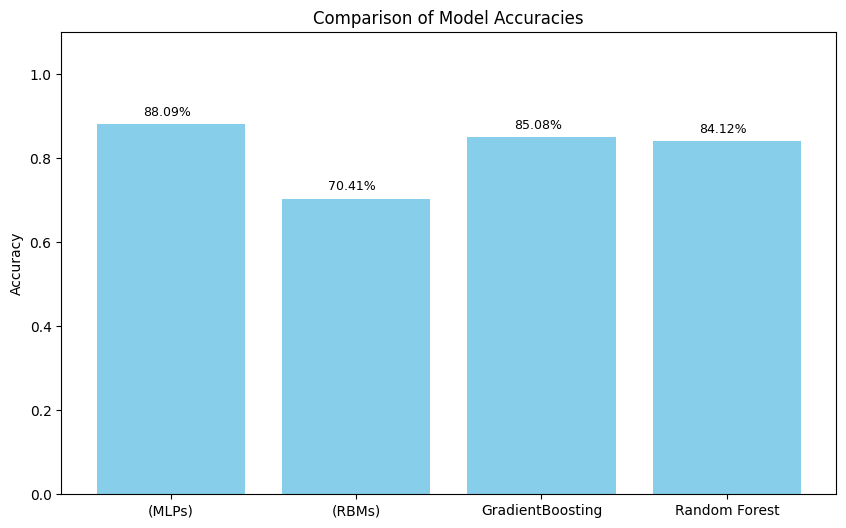

In [ ]:
import matplotlib.pyplot as plt

# Example dictionary of model and accuracy
model_accuracy = {' Multilayer Perceptrons  (MLPs)': 0.8809, 'Restricted Boltzmann Machines (RBMs)': 0.7041, 'GradientBoosting': 0.8508, 'Random Forest': 0.8412}

# Create a figure with a specific size
plt.figure(figsize=(10, 6))

# Set a single color for all bars
color = 'skyblue'

# Create bars with the same color
bars = plt.bar(model_accuracy.keys(), model_accuracy.values(), color=color)

# Add labels and title
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1.1)

# Display accuracy percentages on top of each bar
for bar, acc in zip(bars, model_accuracy.values()):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.02, f'{acc:.2%}', fontsize=9, color='black')

# Show the plot
plt.show()
